# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns




## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df= pd.read_csv('porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Verify conversion
print(df.dtypes[['created_at', 'actual_delivery_time']])

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type


df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

# Verify the conversion
print(df.dtypes[['market_id', 'store_primary_category', 'order_protocol']])

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes

df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Verify the new column
print(df[['created_at', 'actual_delivery_time', 'time_taken']].head())

           created_at actual_delivery_time  time_taken
0 2015-02-06 22:24:17  2015-02-06 23:11:17        47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25        44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35        55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46        59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36        46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp

df['hour'] = df['created_at'].dt.hour

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['created_at'].dt.dayofweek


# Create categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].isin([5, 6]).astype('category')  # 5=Saturday, 6=Sunday

# Verify the new columns
print(df[['created_at', 'hour', 'day_of_week', 'isWeekend']].head())

           created_at  hour  day_of_week isWeekend
0 2015-02-06 22:24:17    22            4     False
1 2015-02-10 21:49:25    21            1     False
2 2015-02-16 00:11:35     0            0     False
3 2015-02-12 03:36:46     3            3     False
4 2015-01-27 02:12:36     2            1     False


In [8]:

# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

# Verify the remaining columns
print(df.head())

  market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  tim

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [9]:
# Define target variable (y) and features (X)

X = df.drop(columns=['time_taken'])  # Drop the target column from features
y = df['time_taken']  # The target column

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [10]:
# Split data into training and testing sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the split data
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")

Training set size: 140621 samples
Validation set size: 35156 samples


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [11]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

# Print the defined columns
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")



Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

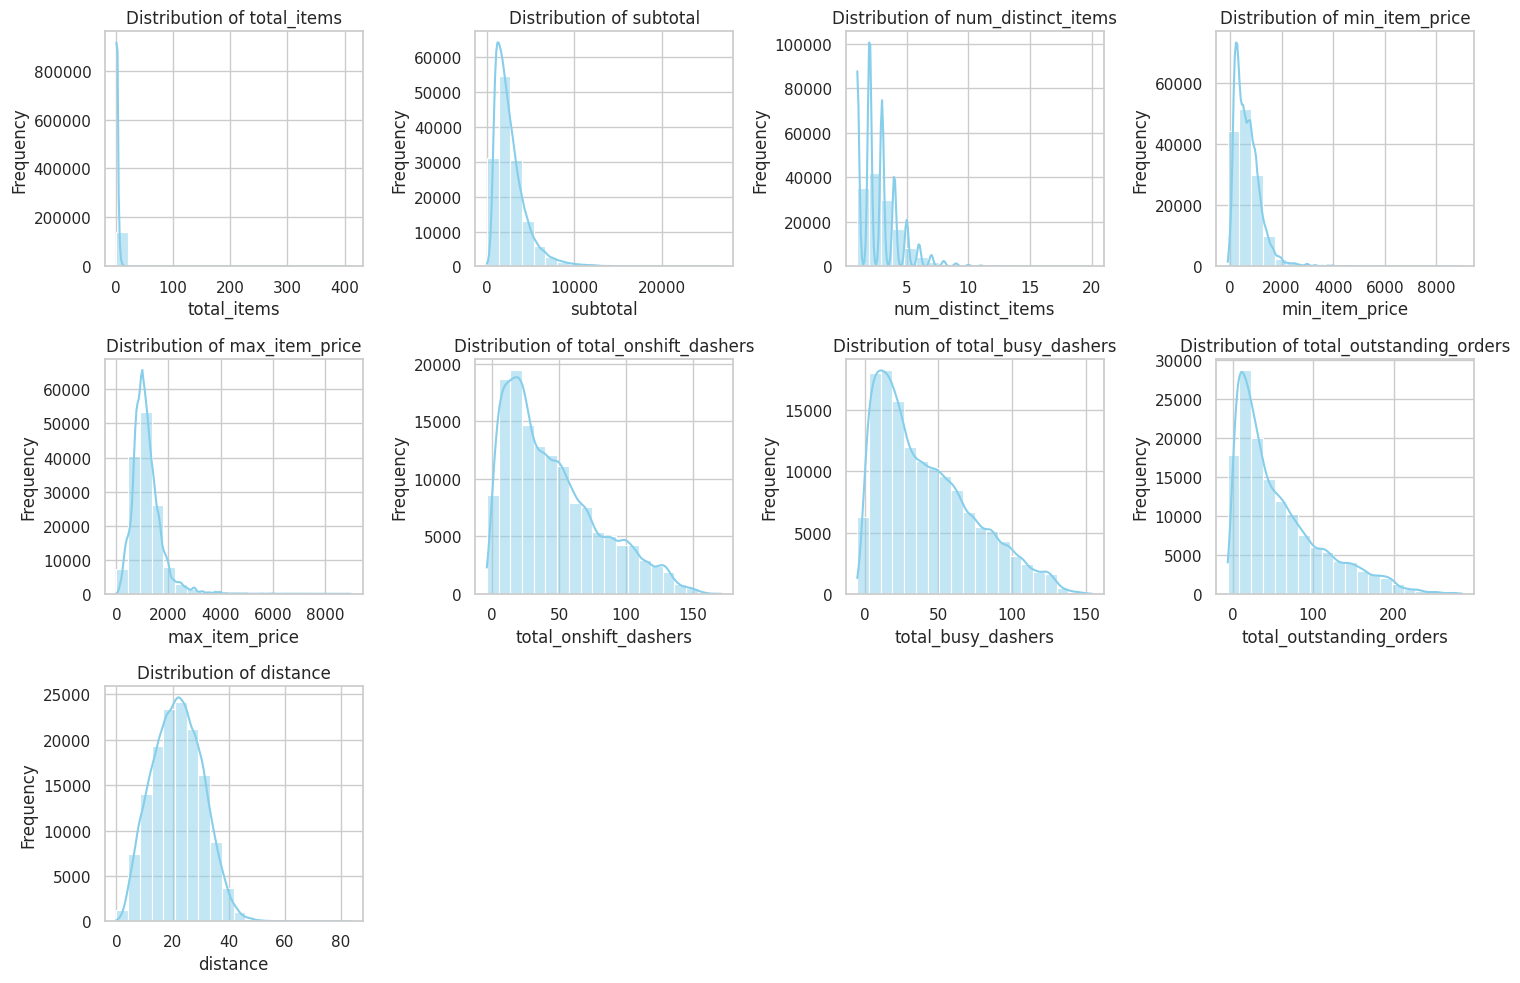

In [12]:
# Plot distributions for all numerical columns

# Set up the plot style
sns.set(style="whitegrid")

# Create a subplot for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size if you have more than 12 numerical columns
    sns.histplot(X_train[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

<ipython-input-13-6859f44a1494>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train[col], palette='Set2')
<ipython-input-13-6859f44a1494>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train[col], palette='Set2')
<ipython-input-13-6859f44a1494>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train[col], palette='Set2')
<ipython-input-13-6859f44a1494>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

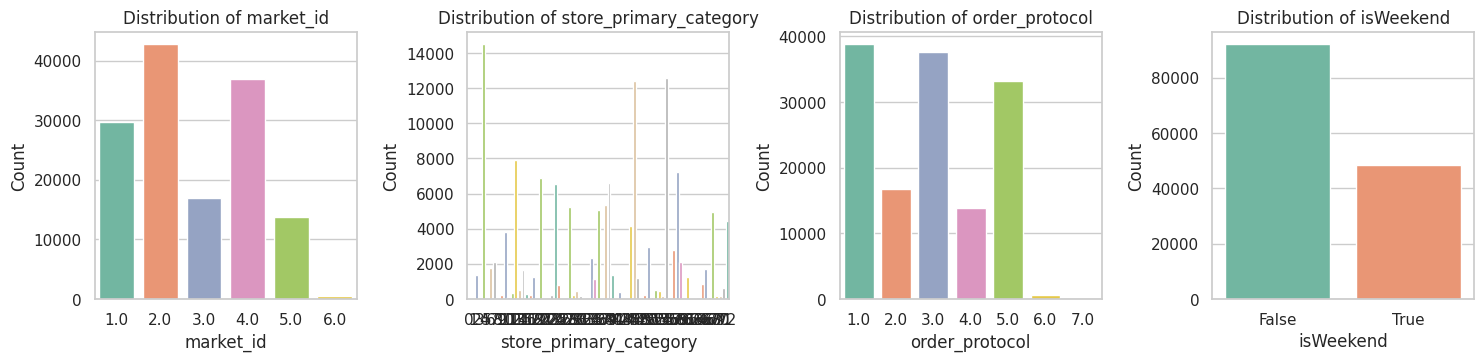

In [13]:
# Distribution of categorical columns

# Set up the plot style
sns.set(style="whitegrid")

# Create a subplot for each categorical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size if needed
    sns.countplot(x=X_train[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

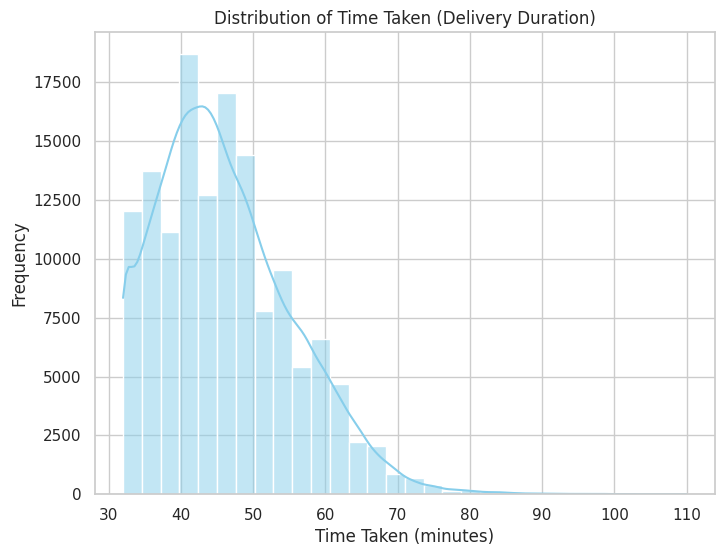

In [ ]:
# Distribution of time_taken

# Set up the plot style
sns.set(style="whitegrid")

# Plot the distribution of 'time_taken' (delivery duration)
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Time Taken (Delivery Duration)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')

plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

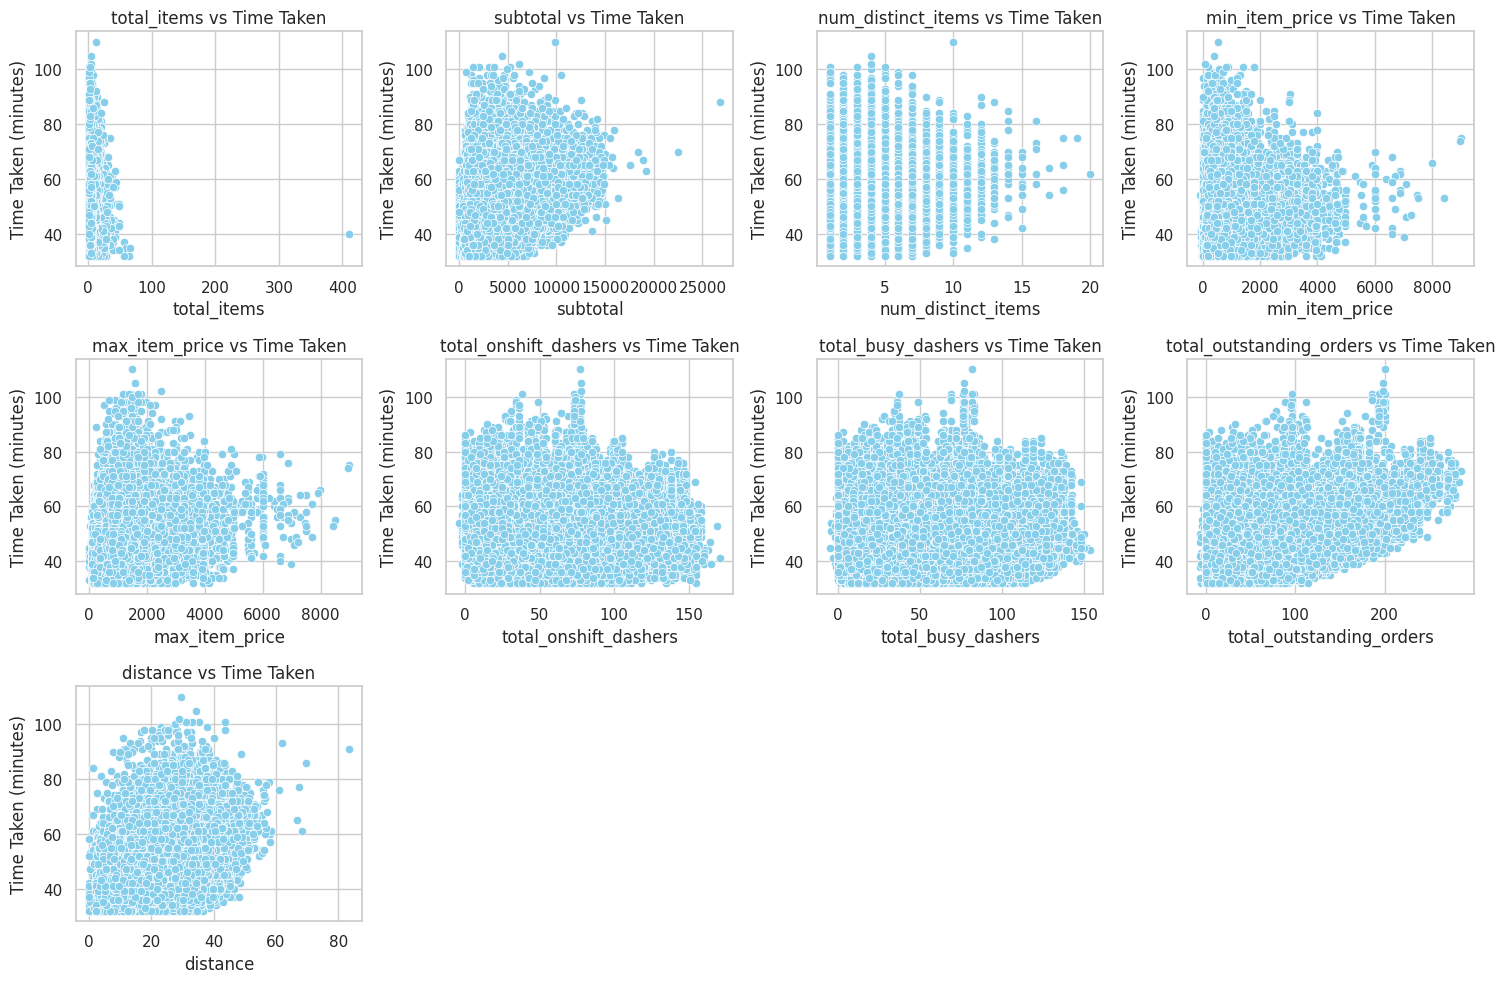

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features
# Set up the plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 10))

# Iterate through all numerical columns and create scatter plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size based on the number of features
    sns.scatterplot(x=X_train[col], y=y_train, color='skyblue')
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()


<ipython-input-15-5618288cd698>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train[col], y=y_train, palette='Set2')
<ipython-input-15-5618288cd698>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train[col], y=y_train, palette='Set2')
<ipython-input-15-5618288cd698>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train[col], y=y_train, palette='Set2')
<ipython-input-15-5618288cd698>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

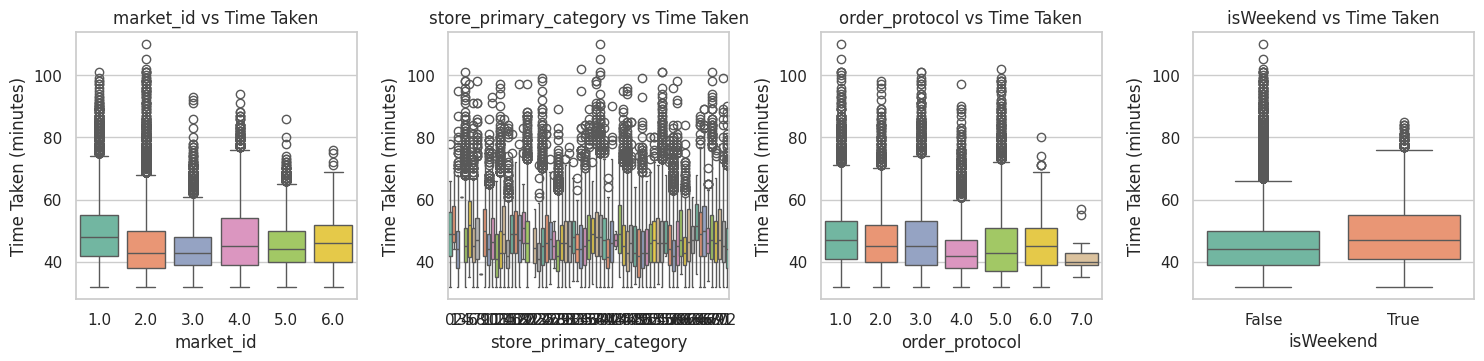

In [15]:
# Set up the plot style
sns.set(style="whitegrid")

# Create subplots for categorical features vs 'time_taken'
categorical_features = categorical_cols  # All categorical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)  # Adjust grid size based on the number of categorical features
    sns.boxplot(x=X_train[col], y=y_train, palette='Set2')
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()

<ipython-input-16-cde68972f976>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['hour'], y=y_train, palette='Set2')


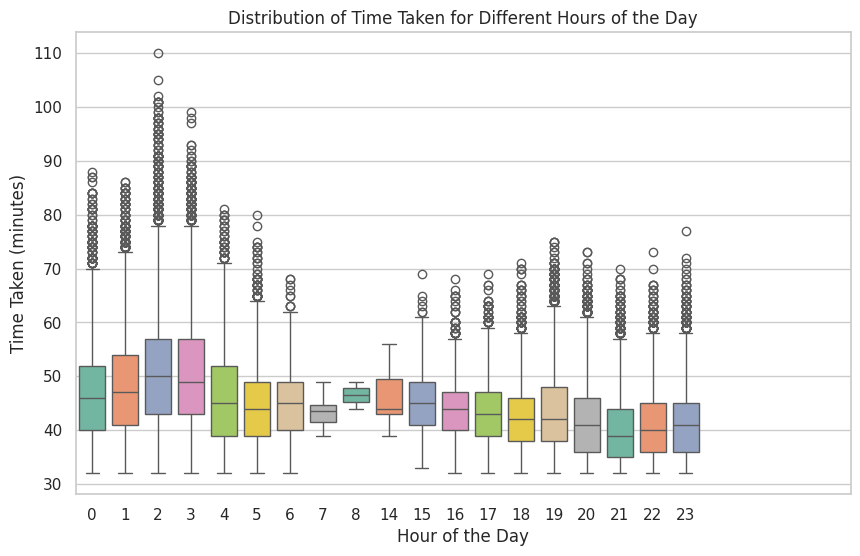

In [16]:
# Show the distribution of time_taken for different hours

# Extract the hour from the 'created_at' timestamp

# Set up the plot style
sns.set(style="whitegrid")

# Plot the distribution of 'time_taken' for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['hour'], y=y_train, palette='Set2')

# Add labels and title
plt.title('Distribution of Time Taken for Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Time Taken (minutes)')
plt.xticks(range(24))  # Set the x-ticks to be from 0 to 23 (24 hours in a day)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

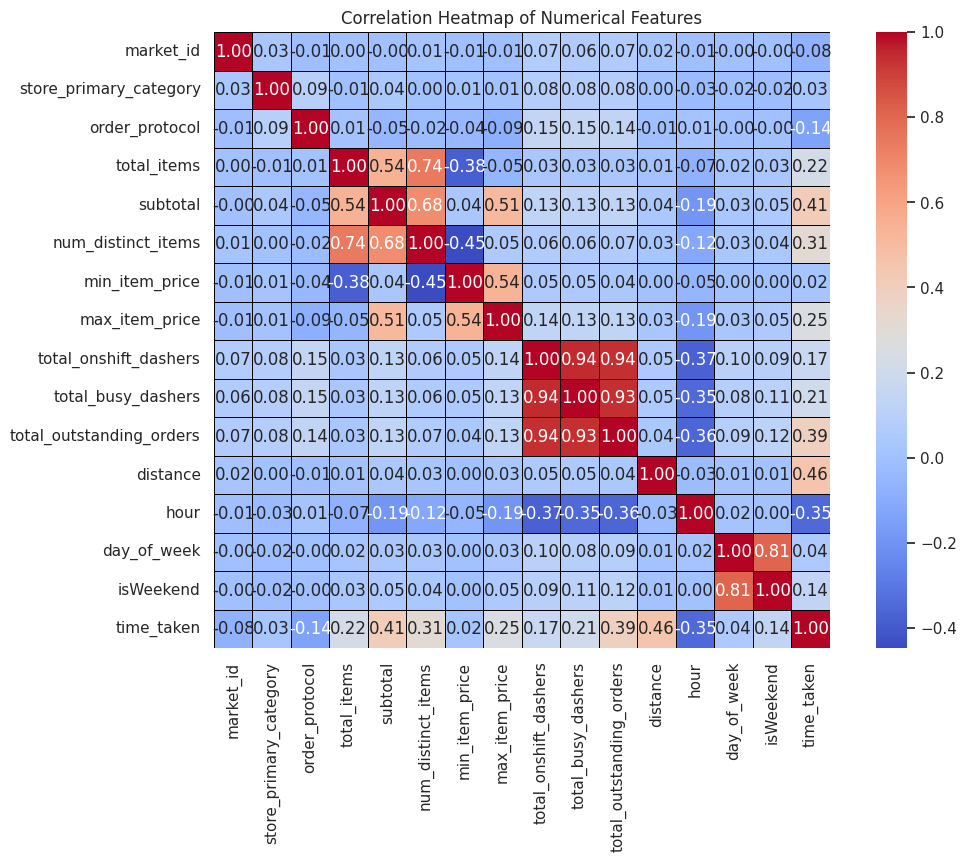

In [17]:
# Plot the heatmap of the correlation matrix

# Set up the plot style
sns.set(style="whitegrid")

# Calculate the correlation matrix
correlation_matrix = X_train.copy()
correlation_matrix['time_taken'] = y_train  # Add target variable for correlation
correlation_matrix = correlation_matrix.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            linewidths=0.5, linecolor='black', square=True)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Display the heatmap
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [18]:
# Drop 3-5 weakly correlated columns from training dataset

# Identify the weakly correlated features (with low correlation with 'time_taken')
# We consider weak correlations as having an absolute value of correlation below a threshold, say 0.1 or 0.2.
weakly_correlated_columns = correlation_matrix['time_taken'].loc[abs(correlation_matrix['time_taken']) < 0.2].index

# Display the weakly correlated columns
print("Weakly Correlated Columns:", weakly_correlated_columns)

# Drop weakly correlated columns from the training dataset
X_train = X_train.drop(columns=weakly_correlated_columns)

# Show the shape of the new dataset to confirm columns have been dropped
print(f"New shape of training data: {X_train.shape}")


Weakly Correlated Columns: Index(['market_id', 'store_primary_category', 'order_protocol',
       'min_item_price', 'total_onshift_dashers', 'day_of_week', 'isWeekend'],
      dtype='object')
New shape of training data: (140621, 8)


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               140621 non-null  int64  
 1   subtotal                  140621 non-null  int64  
 2   num_distinct_items        140621 non-null  int64  
 3   max_item_price            140621 non-null  int64  
 4   total_busy_dashers        140621 non-null  float64
 5   total_outstanding_orders  140621 non-null  float64
 6   distance                  140621 non-null  float64
 7   hour                      140621 non-null  int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 13.2 MB


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

<ipython-input-20-c880519290ab>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, palette='Set2')


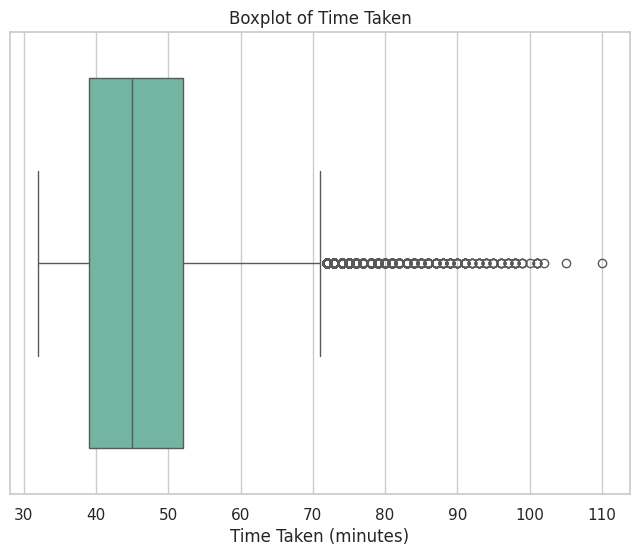

In [20]:
# Boxplot for time_taken

# Set up the plot style
sns.set(style="whitegrid")

# Plot the boxplot for 'time_taken'
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train, palette='Set2')

# Add labels and title
plt.title('Boxplot of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.show()

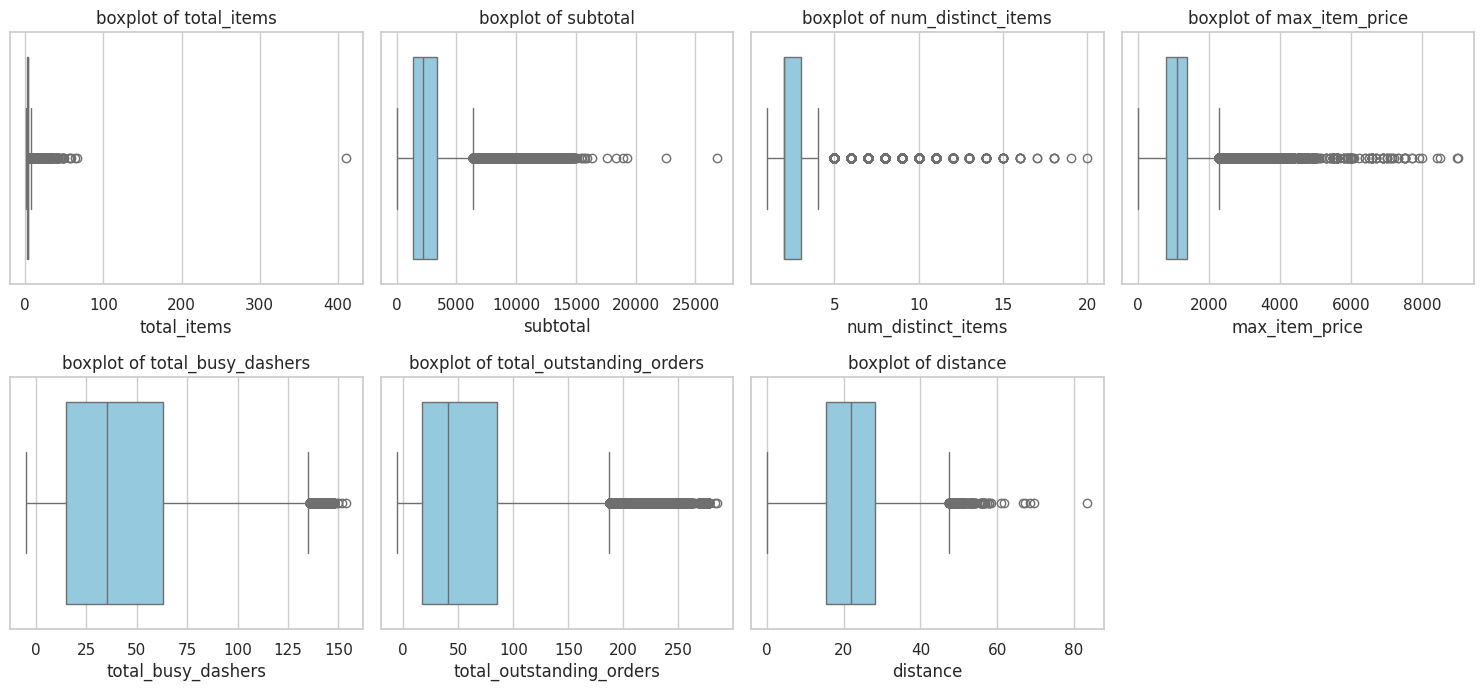

In [21]:
# Scatter plot to visualise the relationship between time_taken and other features
# Set up the plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 10))
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Iterate through all numerical columns and create scatter plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(x=X_train[col], color='skyblue')
    plt.title("boxplot of "+col)
    plt.xlabel(col)


plt.tight_layout()
plt.show()


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               140621 non-null  int64  
 1   subtotal                  140621 non-null  int64  
 2   num_distinct_items        140621 non-null  int64  
 3   max_item_price            140621 non-null  int64  
 4   total_busy_dashers        140621 non-null  float64
 5   total_outstanding_orders  140621 non-null  float64
 6   distance                  140621 non-null  float64
 7   hour                      140621 non-null  int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 13.2 MB


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [23]:
# Handle outliers
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Calculate IQR for each numerical feature
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = (X_train[numerical_cols] < lower_bound) | (X_train[numerical_cols] > upper_bound)

# Print outliers count for each column
print("Outliers detected in each column:")
print(outliers.sum())

# Remove rows with outliers
X_train = X_train[~outliers.any(axis=1)]

# Check the shape of the new dataset after removing outliers
print(f"New shape of training data after removing outliers: {X_train.shape}")

Outliers detected in each column:
total_items                  6803
subtotal                     6474
num_distinct_items          16678
max_item_price               5515
total_busy_dashers            366
total_outstanding_orders     4184
distance                      264
dtype: int64
New shape of training data after removing outliers: (113275, 8)


In [24]:
y_train = y_train[~outliers.any(axis=1)]

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113275 entries, 102712 to 121958
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               113275 non-null  int64  
 1   subtotal                  113275 non-null  int64  
 2   num_distinct_items        113275 non-null  int64  
 3   max_item_price            113275 non-null  int64  
 4   total_busy_dashers        113275 non-null  float64
 5   total_outstanding_orders  113275 non-null  float64
 6   distance                  113275 non-null  float64
 7   hour                      113275 non-null  int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 7.3 MB


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [26]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_val.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_val.select_dtypes(include=['category']).columns.tolist()

# Print the defined columns
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

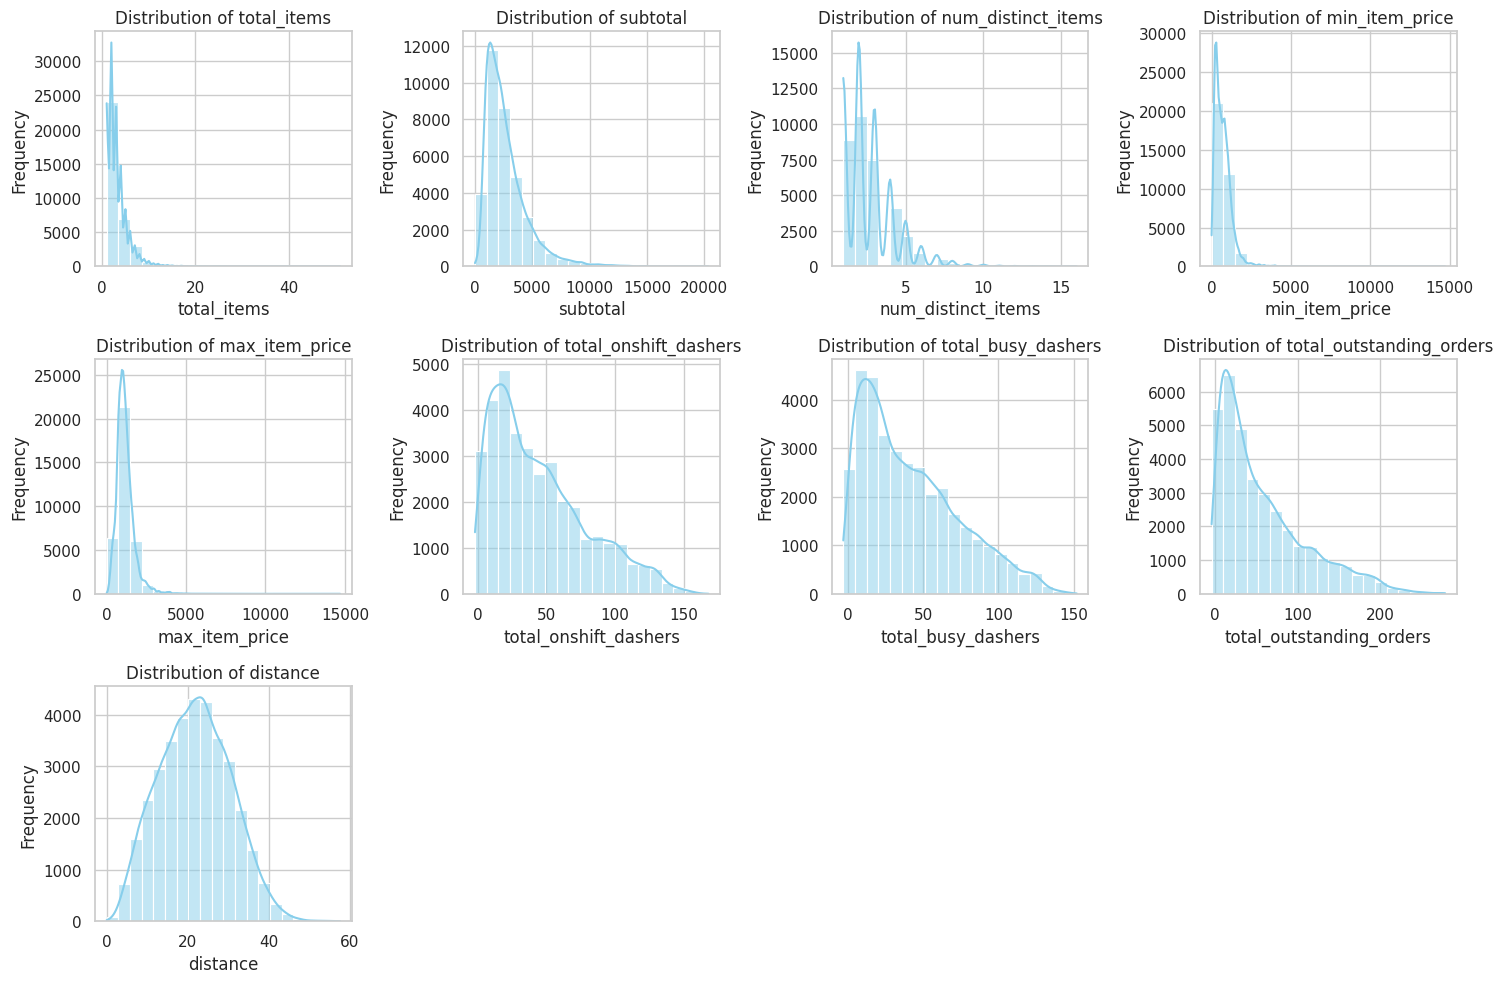

In [27]:
# Plot distributions for all numerical columns


# Set up the plot style
sns.set(style="whitegrid")

# Create a subplot for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size if you have more than 12 numerical columns
    sns.histplot(X_val[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

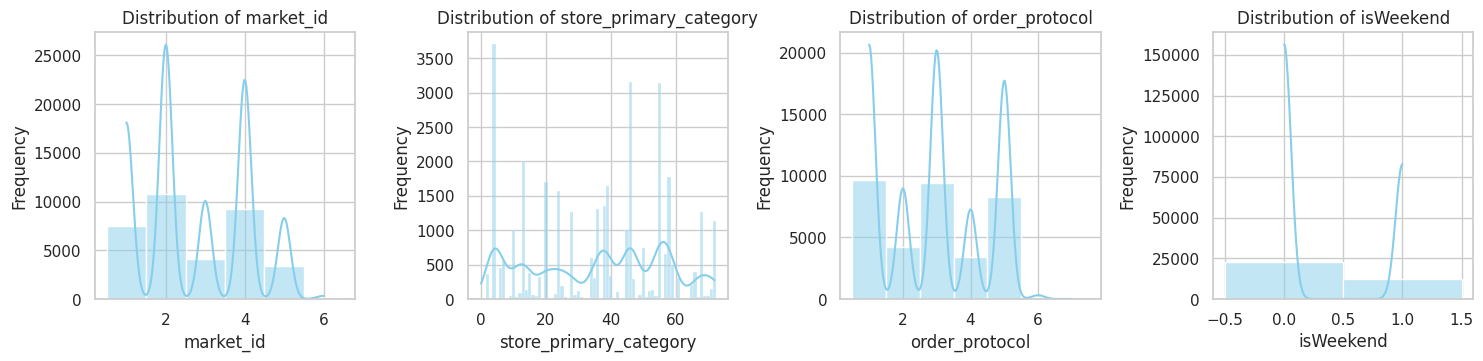

In [28]:
# Distribution of categorical columns


# Set up the plot style
sns.set(style="whitegrid")

# Create a subplot for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size if you have more than 12 numerical columns
    sns.histplot(X_val[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

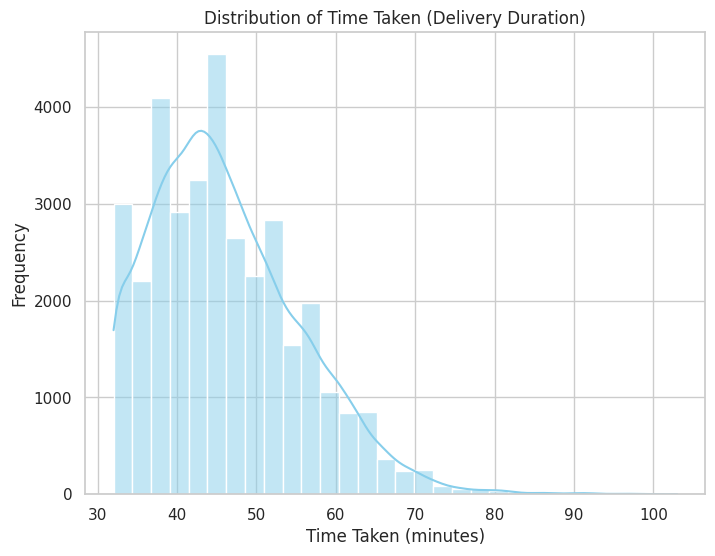

In [29]:
# Distribution of time_taken

# Distribution of time_taken

# Set up the plot style
sns.set(style="whitegrid")

# Plot the distribution of 'time_taken' (delivery duration)
plt.figure(figsize=(8, 6))
sns.histplot(y_val, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Time Taken (Delivery Duration)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')

plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

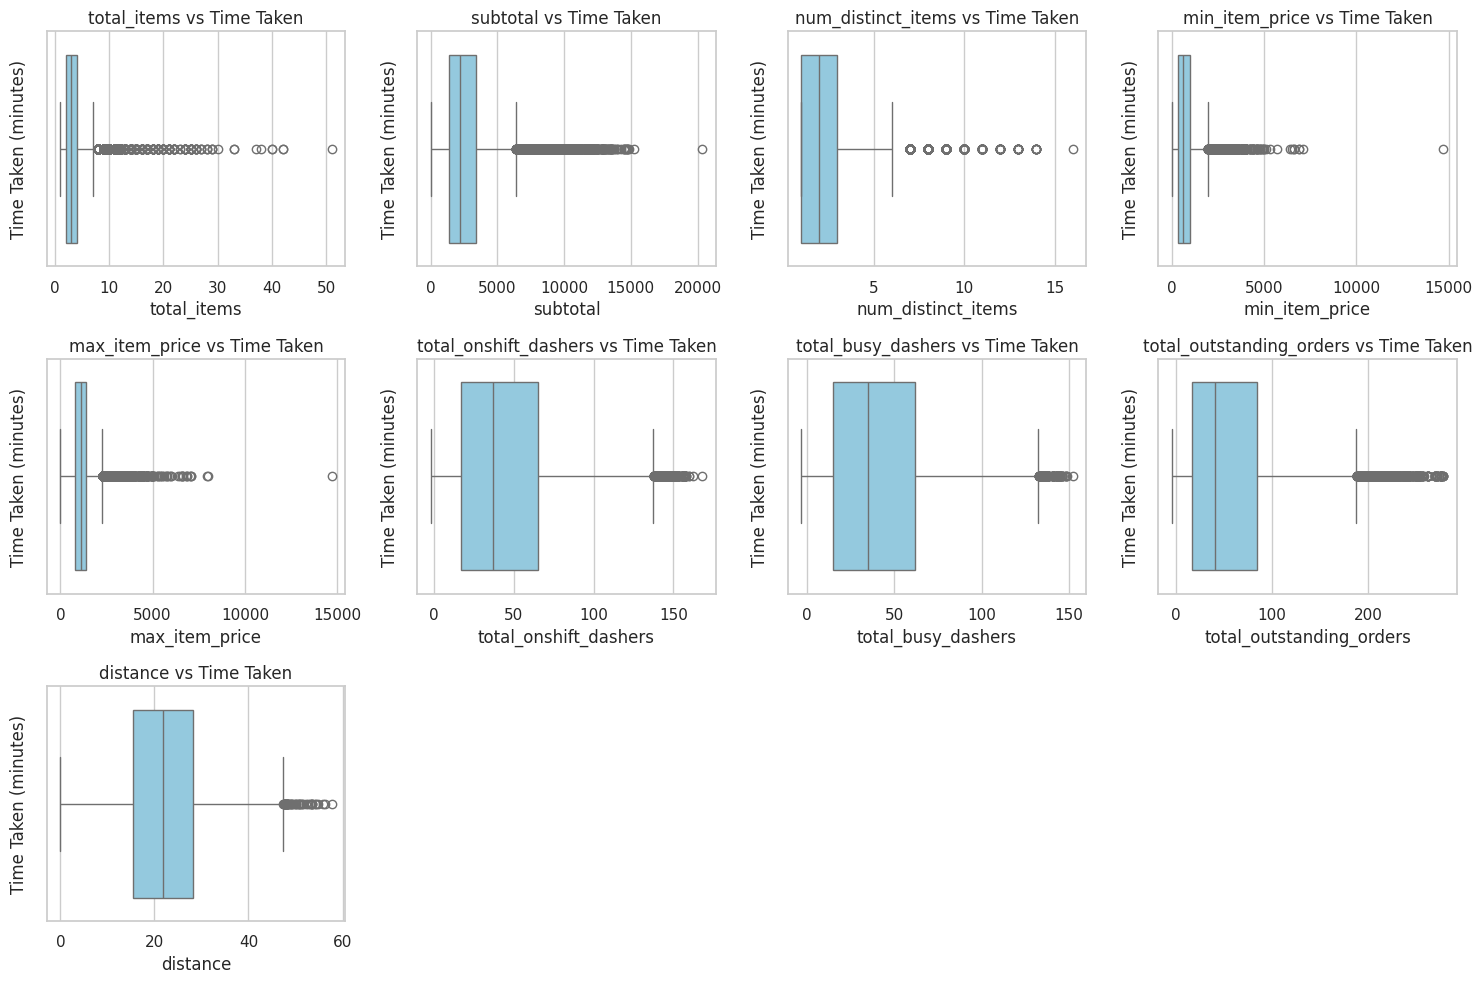

In [30]:
# Scatter plot to visualise the relationship between time_taken and other features

# Set up the plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 10))
numerical_cols = X_val.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Iterate through all numerical columns and create scatter plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(x=X_val[col], color='skyblue')
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

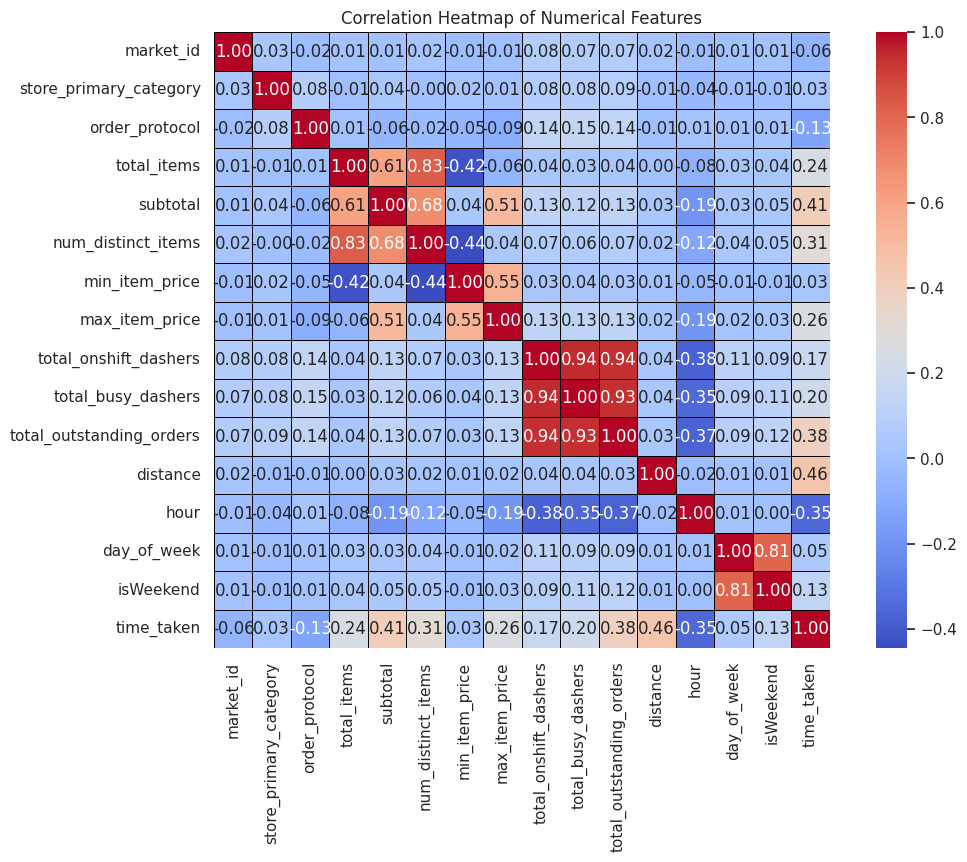

In [31]:
#
 #Plot the heatmap of the correlation matrix

# Set up the plot style
sns.set(style="whitegrid")

# Calculate the correlation matrix
correlation_matrix = X_val.copy()
correlation_matrix['time_taken'] = y_val  # Add target variable for correlation
correlation_matrix = correlation_matrix.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            linewidths=0.5, linecolor='black', square=True)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Display the heatmap
plt.show()


In [32]:
# Drop 3-5 weakly correlated columns from training dataset

# Identify the weakly correlated features (with low correlation with 'time_taken')
# We consider weak correlations as having an absolute value of correlation below a threshold, say 0.1 or 0.2.
weakly_correlated_columns = correlation_matrix['time_taken'].loc[abs(correlation_matrix['time_taken']) < 0.2].index

# Display the weakly correlated columns
print("Weakly Correlated Columns:", weakly_correlated_columns)

# Drop weakly correlated columns from the training dataset
X_val = X_val.drop(columns=weakly_correlated_columns)

# Show the shape of the new dataset to confirm columns have been dropped
print(f"New shape of training data: {X_val.shape}")


Weakly Correlated Columns: Index(['market_id', 'store_primary_category', 'order_protocol',
       'min_item_price', 'total_onshift_dashers', 'day_of_week', 'isWeekend'],
      dtype='object')
New shape of training data: (35156, 8)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [33]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [34]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns in training data
X_train_scaled = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Also scale the numerical columns in test data (use transform only, not fit_transform)
X_test_scaled = X_val.copy()
X_test_scaled = scaler.transform(X_test_scaled)

# Confirm scaling
print("Feature scaling applied.")


Feature scaling applied.


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [36]:
# Create/Initialise the model
import statsmodels.api as sm
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Add a constant (bias/intercept term) to the predictors
X_trained_sm = sm.add_constant(X_train_scaled_df)
X_trained_sm.info()
#train the training data
# Reset index of y_train to match X
y_train_aligned = y_train.reset_index(drop=True)
# Fit the OLS model
ols_model = sm.OLS(y_train_aligned, X_trained_sm).fit()

# Print the summary
print(ols_model.summary())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113275 entries, 0 to 113274
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   const                     113275 non-null  float64
 1   total_items               113275 non-null  float64
 2   subtotal                  113275 non-null  float64
 3   num_distinct_items        113275 non-null  float64
 4   max_item_price            113275 non-null  float64
 5   total_busy_dashers        113275 non-null  float64
 6   total_outstanding_orders  113275 non-null  float64
 7   distance                  113275 non-null  float64
 8   hour                      113275 non-null  float64
dtypes: float64(9)
memory usage: 7.8 MB
                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.6

In [ ]:
# Make predictions

X_test_sm = sm.add_constant(X_test_scaled)
y_pred = ols_model.predict(X_test_sm)

In [ ]:
# Find results for evaluation metrics

# Evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3.8179033261709265
Root Mean Squared Error (RMSE): 5.127039603467297
R² Score: 0.6996761024539283


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

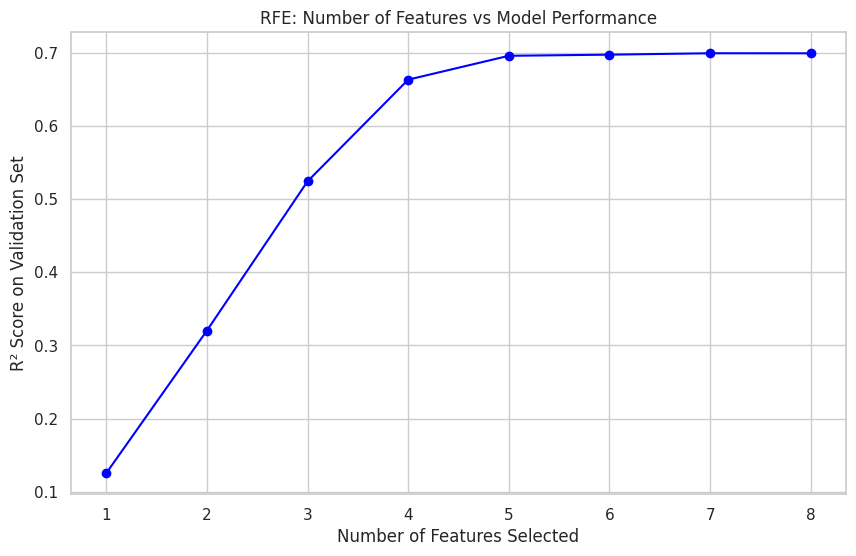


✅ Best number of features: 7
📈 Highest R² Score: 0.6997


In [ ]:
from sklearn.feature_selection import RFE
#loop through features
# Use Linear Regression as the base estimator
estimator = LinearRegression()

# Store performance for each number of features
r2_scores = []
num_features_list = list(range(1, X_train_scaled.shape[1] + 1))

for n_features in num_features_list:
    # Apply RFE
    selector = RFE(estimator, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)

    # Predict and evaluate on validation set
    y_pred = selector.predict(X_test_scaled)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

# Plot number of features vs R² score
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, r2_scores, marker='o', color='blue')
plt.xlabel('Number of Features Selected')
plt.ylabel('R² Score on Validation Set')
plt.title('RFE: Number of Features vs Model Performance')
plt.grid(True)
plt.show()

# Find the best number of features
best_n = num_features_list[np.argmax(r2_scores)]
print(f"\n✅ Best number of features: {best_n}")
print(f"📈 Highest R² Score: {max(r2_scores):.4f}")


✅ Final selected features: Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

✅ Final Model Performance:
📉 Mean Squared Error (MSE): 26.2809
📈 R² Score: 0.6997


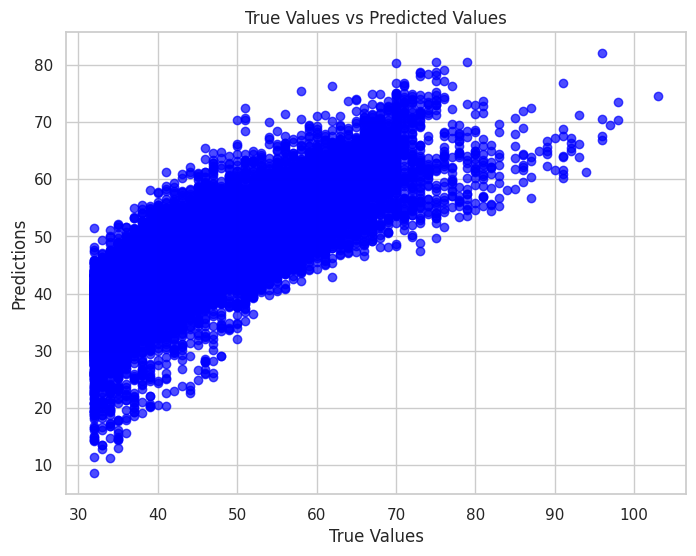

In [ ]:
# Build the final model with selected number of features

# Step 1: Use RFE with the best number of features
final_selector = RFE(estimator, n_features_to_select=best_n)
final_selector = final_selector.fit(X_train_scaled, y_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Step 2: Get the selected features
selected_features = X_train_scaled.columns[final_selector.support_]
print(f"\n✅ Final selected features: {selected_features}")
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_val.columns)
# Step 3: Train the model using only the selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

# Train the Linear Regression model
final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

# Step 4: Make predictions on the test set
y_pred = final_model.predict(X_test_selected)

# Step 5: Evaluate the performance of the final model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"\n✅ Final Model Performance:")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

# Optionally, you can visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predicted Values')
plt.grid(True)
plt.show()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

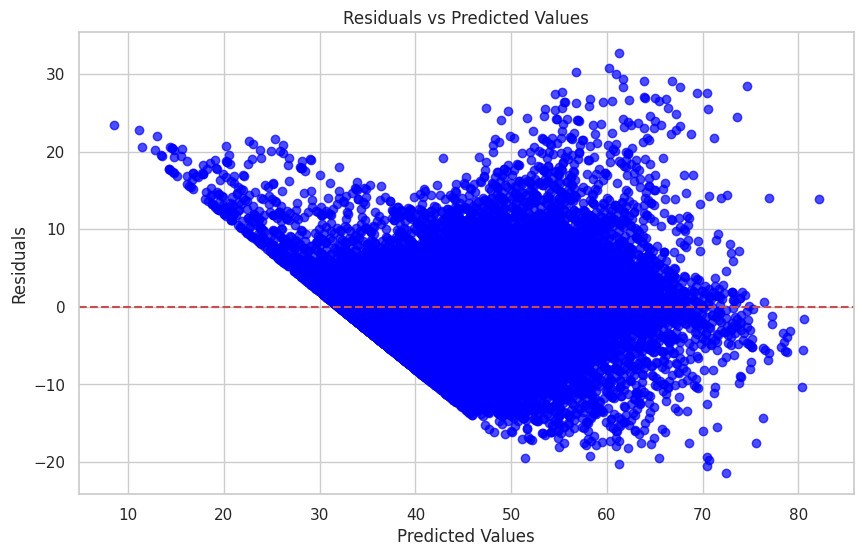

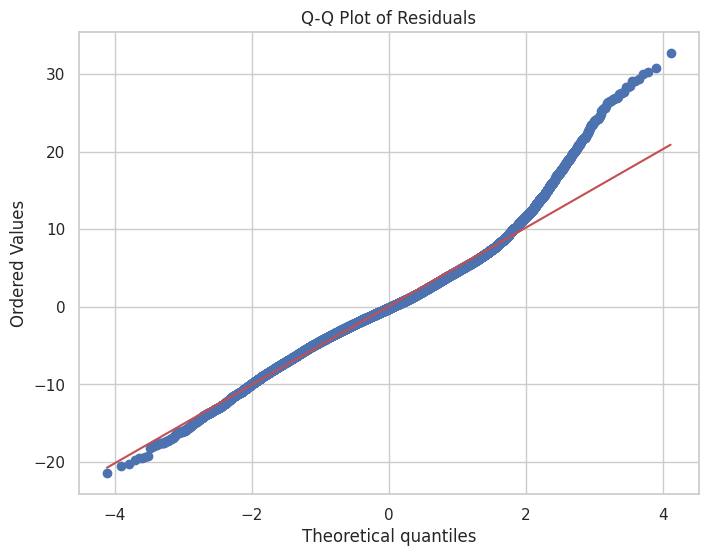

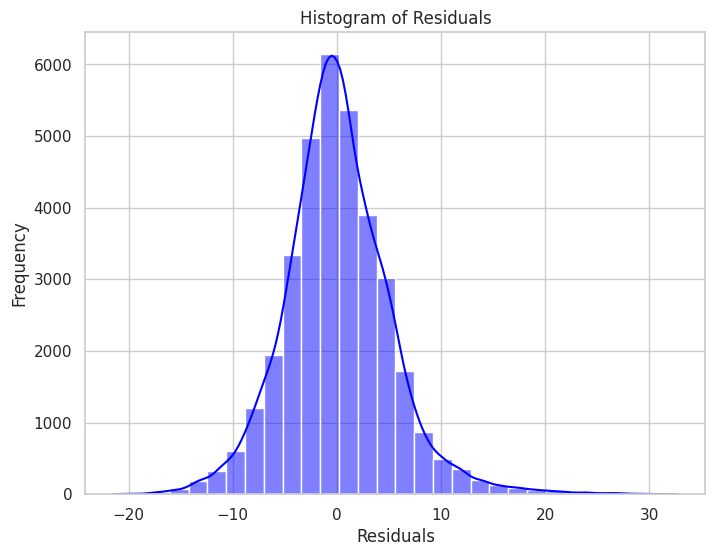

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Calculate residuals
residuals = y_val - y_pred

# 1. Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# 3. Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

# Unscaled Coefficients:
unscaled_model = LinearRegression()
unscaled_model.fit(X_train, y_train)  # Fit with unscaled features
unscaled_coefficients = unscaled_model.coef_

# Scaled Coefficients:
scaled_coefficients = final_model.coef_

# Feature Names (assuming you have them stored)
feature_names = X_train.columns

# Displaying Unscaled Coefficients
print("Unscaled Coefficients (Original Features):")
for feature, coef in zip(feature_names, unscaled_coefficients):
    print(f"{feature}: {coef:.4f}")

# Displaying Scaled Coefficients
print("\nScaled Coefficients (Standardized Features):")
for feature, coef in zip(feature_names, scaled_coefficients):
    print(f"{feature}: {coef:.4f}")

Unscaled Coefficients (Original Features):
total_items: -0.1110
subtotal: 0.0014
num_distinct_items: 0.5709
max_item_price: 0.0007
total_busy_dashers: -0.3531
total_outstanding_orders: 0.2442
distance: 0.4683
hour: -0.1998

Scaled Coefficients (Standardized Features):
total_items: 1.5163
subtotal: 0.4830
num_distinct_items: 0.3495
max_item_price: -10.3825
total_busy_dashers: 11.1257
total_outstanding_orders: 4.0623
distance: -1.7625


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get unscaled coefficients
unscaled_model = LinearRegression()
unscaled_model.fit(X_train, y_train)  # Fit with unscaled features

# Retrieve the coefficient for 'total_items' (assuming it's in the feature set)
unscaled_coef_total_items = unscaled_model.coef_[X_train.columns.get_loc('total_items')]

print(f"Unscaled coefficient for 'total_items': {unscaled_coef_total_items:.4f}")

Unscaled coefficient for 'total_items': -0.1110


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes there are three catogorical variables but they dont have any rgffect on the dependent varibale as they are weakly corraltetd to the dependent varibale.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

 **Answer:**
>test_size - 0.2 means we are splitting the test and training data into 20:80 ratio. that mean 20% is the test data and 80%is the training data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

** **Answer:**
>"distance" has the highest coefficinet and hence has the highest correlation with the target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> 1.  plot a box plot for all the variables including the tarhet varibale to visualize the outliners.                               2.  calucate the IQR we too 25:75 ration.    3.  defining the lower bound and upper bound for outliner detection                       
4. anything outside lower bound and upper bound is outliers.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Distance , subtotal, total_outsatnding_orders



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>    1. Initialize coefficients β0,β1,…,βpβ0​,β1​,…,βp​.

    2. Compute the predicted values y​ for all data points.

    3. Calculate the error (MSE or another loss function).

    4. Use optimization techniques (Gradient Descent or Normal Equation) to minimize the error and update the coefficients.

    4. Once trained, make predictions on new data.

    5. Evaluate the model’s performance.






---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>| **Aspect**                          | **Simple Linear Regression**                                                                  | **Multiple Linear Regression**                                                                                                          |
| ----------------------------------- | --------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Number of Independent Variables** | 1 (Single feature)                                                                            | 2 or more (Multiple features)                                                                                                           |
| **Equation**                        | $y = \beta_0 + \beta_1 x + \epsilon$                                                          | $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$                                                              |
| **Complexity**                      | Simpler, easier to understand and visualize                                                   | More complex, harder to visualize in 2D/3D                                                                                              |
| **Use Case**                        | When only one feature is thought to affect the target                                         | When multiple features affect the target variable                                                                                       |
| **Interpretation of Coefficients**  | The coefficient shows how much the target changes with a 1-unit change in the single feature. | Each coefficient shows how much the target changes with a 1-unit change in the respective feature, holding all other features constant. |
| **Assumptions**                     | Assumes a linear relationship between one independent variable and the dependent variable.    | Assumes a linear relationship between multiple independent variables and the dependent variable.                                        |
| **Model Visualization**             | A straight line in 2D.                                                                        | A hyperplane in multi-dimensional space (difficult to visualize).                                                                       |




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The Cost quantifies how well the model is performing. In linear regression, the cost function measures the difference between the actual and predicted values of the target variable, and our goal is to minimize this cost to find the best-fitting model.
Minimizing the cost function essentially means optimizing the model's coefficients so that the difference between the predicted and actual target values is minimized. This can be done using the following techniques:
1. Gradient Descent (Iterative Approach)
2. Normal Equation (Analytical Approach)




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting

Definition: Overfitting occurs when the model learns the details and noise in the training data to an extent that it negatively impacts the model’s performance on new, unseen data. Essentially, the model fits the training data too well, capturing even the random fluctuations or errors in the data.

    Cause:

        The model is too complex (e.g., too many features, too many polynomial terms, high-degree polynomials, or too many layers in neural networks).

        The model memorizes the training data instead of generalizing from it.

    Signs of Overfitting:

        High accuracy on training data, but low accuracy on validation/test data.

        The model performs well on specific examples but poorly on new, unseen data.

    Visualizing Overfitting:

        In regression, overfitting can be visualized as a curve that passes through almost all the data points in the training set, even though the underlying relationship may be simpler (like a straight line or a smooth curve).

Underfitting

Definition: Underfitting occurs when the model is too simple to capture the underlying structure of the data. It fails to learn the patterns in the training data, resulting in poor performance both on the training set and on unseen data.

    Cause:

        The model is too simple (e.g., linear models for non-linear data, or not enough features).

        The model does not have enough capacity (e.g., using too few parameters or too low-degree polynomial).

        Not enough training or insufficient iterations during model training.

    Signs of Underfitting:

        Low accuracy on both training and validation/test data.

        The model makes very poor predictions because it hasn't learned the underlying structure of the data.

    Visualizing Underfitting:

        In regression, underfitting can be visualized as a model that is too simplistic (e.g., a straight line that doesn’t adequately capture the trend in a dataset that has a non-linear relationship).



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residuals vs. Fitted Values Plot:

    Helps to check for linearity and homoscedasticity.

    Can detect non-linearity and heteroscedasticity.

Histogram of Residuals:

    Helps check the normality of residuals.

    Should ideally look like a bell-shaped curve if errors are normally distributed.

Q-Q Plot (Quantile-Quantile Plot):

    Helps check if residuals follow a normal distribution.

Residuals vs. Time or Another Variable (for Time Series):

    Checks for autocorrelation or dependence in the residuals.

    A random scatter indicates no autocorrelation.